# Understanding and Predicting Employee Turnover¶


# HR Analytics

## Table of Contents
### The Problem
- [Why is Employee Turnover a Problem?](#problem)

### Data Quality Check
- [Simple Inspection of Data](#datacleaning)

### Descriptive Statistics
- [Summary Statistics, Turnover Rate, Size of Data](#descriptive_statistics)
- [Correlation Matrix](#correlation_matrix)

### Exploratory Data Analysis
- [ Jobsatisfaction vs MonthlyIncome & JobSatisfaction vs PercentSalaryHike ](#eda1)
- [Employee Satisfaction VS Evaluation](#eda2)
- [K Means Clustering of Employee](#clustering)
- [Employee Satisfaction Distribution](#satisfaction)
- [Employee Project Count Distribution](#project_count)
- [Employee Average Monthly Hours Distribution](#avghours)

### Simple Pre-Processing
- [Pre-Processing: Categorical and Numerical Variable](#pre_processing)

### Class Imbalance
- [How to Treat Class Imbalance Problems](#class_imbalance)

### Split Train/Test Set
- [Splitting the Data into Train/Test Sets](#train_test_split)

### Resample Techniques to Treat Imbalance Data
- [Evaluate Original, Upsampled, and Downsampled Data Metrics](#resample)
- [Choose Which Sampling Technique to Use For Model - Upsampling](#upsampling)

### Train/Test Model Perfomance with 5-Fold CV
- [Logistic Regression Classifier](#lr)
- [Random Forest Classifier](#rf)
- [Support Vector Classifier](#svc)

### Evaluation Metric (F1 Score & ROC/AUC)
- [ROC and AUC](#roc)
- [Feature Importance](#feature_importance)

### Conclusion
- [Retention Plan](#retention_plan)




***
### Objective: 
- To understand what factors contributed most to employee turnover.

- To perform clustering to find any meaningful patterns of employee traits.

- To create a model that predicts the likelihood if a certain employee will leave the company or not. 

- To create or improve different retention strategies on targeted employees. 

The implementation of this model will allow management to create better decision-making actions.

### We'll be covering:
1. Descriptive Analytics - What happened?
2. Predictive Analytics - What might happen?
3. Prescriptive Analytics - What should we do?


<a id='problem'></a>
### The Problem:

One of the most common problems at work is **turnover.** 

Replacing a worker earning about **50,000 dollars** cost the company about **10,000 dollars** or 20% of that worker’s yearly income according to the Center of American Progress.

Replacing a high-level employee can cost multiple of that...

**Cost include:**
- Cost of off-boarding 
- Cost of hiring (advertising, interviewing, hiring)
- Cost of onboarding a new person (training, management time)
- Lost productivity (a new person may take 1-2 years to reach the productivity of an existing person)

**Annual Cost of Turnover** = (Hiring + Onboarding + Development + Unfilled Time) * (# Employees x Annual Turnover Percentage)

**Annual Cost of Turnover** = (1,000 + 500) x (15,000 * 24%)

**Annual Cost of Turnover)** = 1500 x 3600

**Annual Cost of Turnover)** = 5400000


## Example

1. Jobs (earning under 30k a year): the cost to replace a 10/hour retail employee would be **3,328 dollars**.
2. Jobs (earning 30k-50k a year) - the cost to replace a 40k manager would be **8,000 dollars**.
3. Jobs of executives (earning 100k+ a year) - the cost to replace a 100k CEO is **213,000 dollars**.

# Import Packages
***

In [61]:
import numpy as np, pandas as pd
import scipy.stats as stat
import sklearn as sk
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")    # Ignore warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Loading Data

In [83]:
hr=pd.read_csv('c:/users/sonal/ibmhr.csv')

# Examine the data

In [29]:
hr.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0


# Data Quality check

In [4]:
# Check missing values
hr.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

# Use .info() to see length and dtypes

In [5]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

# Check for duplicates

In [6]:
hr.duplicated().sum()

0

In [7]:
# Check the type of our features. Are there any data inconsistencies?
hr.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [84]:
# Since following variables have no predictive power we  drop these variables
hr=hr.drop(['EmployeeCount','Over18','StandardHours','EmployeeNumber'],axis=1)

# Exploratory Data Analysis

In [9]:
# Number of employees  in the dataset?
hr.shape

(1470, 31)

In [10]:
# Calculate the turnover rate of our company's dataset. What's the rate of turnover?
turnover_rate = hr.Attrition.value_counts() / 1470
turnover_rate

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

In [11]:
# Display the statistical overview of the employees
hr.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.00,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.0,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.00,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.00,4.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.00,19999.0


In [12]:
# Display the mean summary of Employees (Turnover V.S. Non-turnover). 
turnover_Summary = hr.groupby('Attrition')
turnover_Summary.mean()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,
No,37.561233,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
Yes,33.607595,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321


# Visualize Target Variable: Attrition

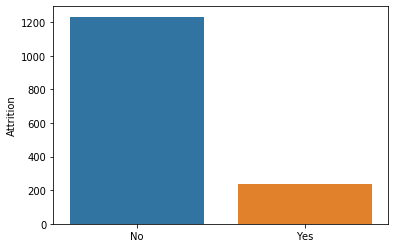

In [13]:
#  How many records of people leaving the company exist in the dataset?
hr_left_df = pd.DataFrame( hr.Attrition.value_counts() )
sns.barplot( hr_left_df.index, hr_left_df.Attrition )

# EDA 1
## Multiple Count Plots 

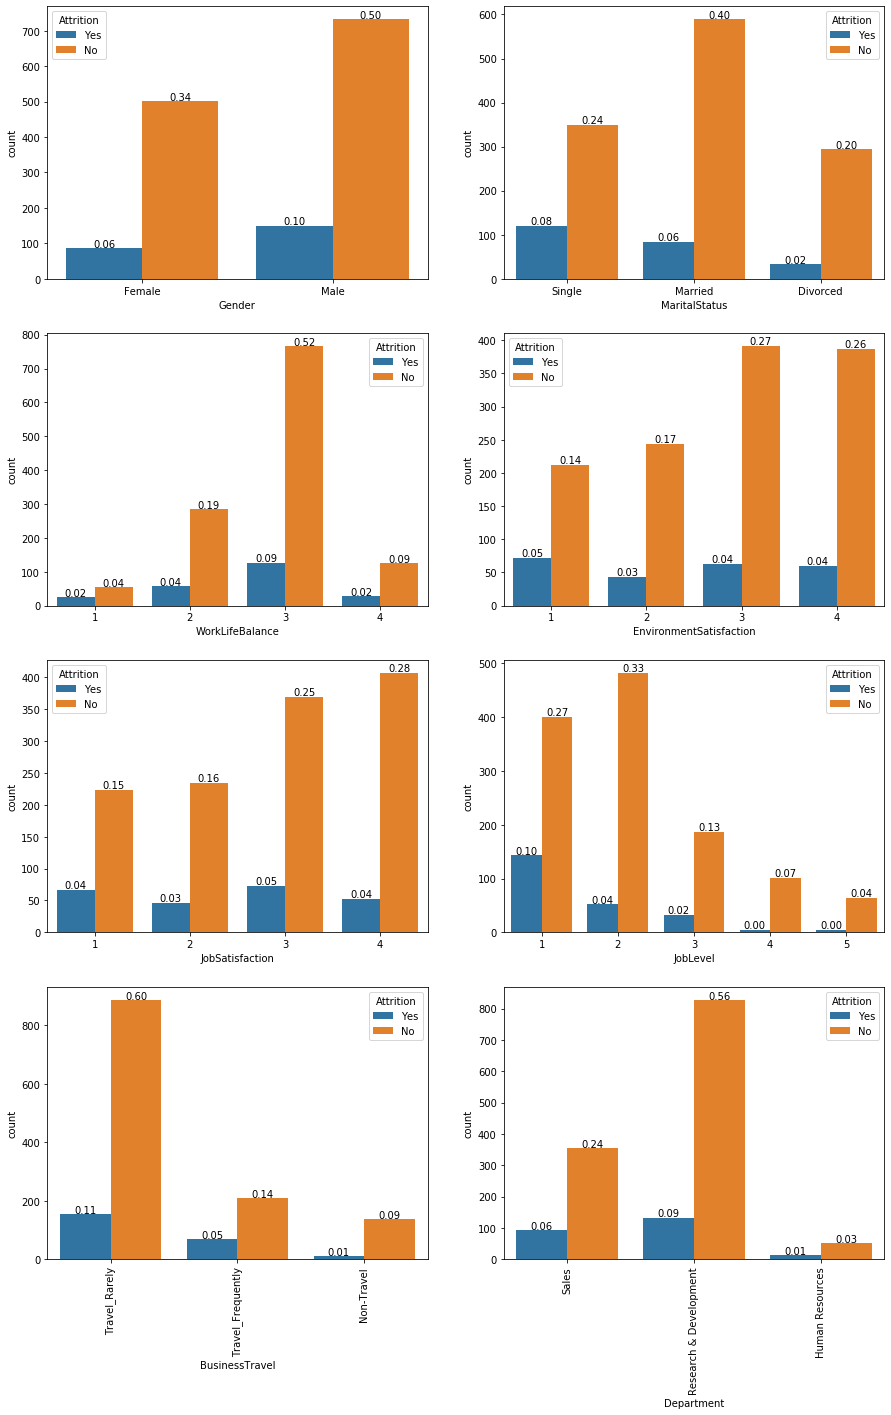

In [7]:
total_records= len(hr)
columns = ["Gender","MaritalStatus","WorkLifeBalance","EnvironmentSatisfaction","JobSatisfaction",
           "JobLevel","BusinessTravel","Department"]
plt.figure(figsize=(15,6))
j=0
for i in columns:
    j +=1
    plt.subplot(4,2,j)
    #sns.countplot(hrdata[i])
    ax1 = sns.countplot(data=hr,x= i,hue="Attrition")
    if(j==8 or j== 7):
        plt.xticks( rotation=90)
    for p in ax1.patches:
        height = p.get_height()
        ax1.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}'.format(height/total_records,0),
                ha="center",rotation=0) 

# Custom the subplot layout
plt.subplots_adjust(bottom=-0.9, top=2)
plt.show()

### Observation of above Count Plot Graph¶


##### 1)Single attrition rate is 50% in marital status.
##### 2) Job Level -1 attrition rate is also high comapre to other job levels
##### 3)EnvironmentSatisfaction Level 1 has high attrition rate.
##### 4)Attrition raltes are high in these attribute Sales Deparment, Male,Jobsatisfaction 1
##### 5) Employees who travel rarely have a higher attrition than employees who travel frequently

#  EDA 2
## Employee Satisfaction

Text(0.5, 1.0, 'Employee Satisfaction Distribution - Turnover V.S. No Turnover')

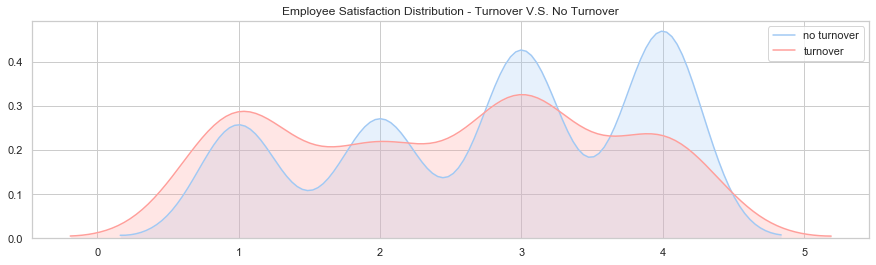

In [270]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(hr.loc[(hr['Attrition'] == 0),'JobSatisfaction'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(hr.loc[(hr['Attrition'] == 1),'JobSatisfaction'] , color='r',shade=True, label='turnover')
plt.title('Employee Satisfaction Distribution - Turnover V.S. No Turnover')

#### It can be noted, large number of people who had lower satisfaction levels, have left the company. This makes sense. But there is also a surge in at higher level of satisfaction. Need to understand and deal with these employees with a different stategy

# EDA 3 
## Employee Department Distribution

In [290]:
hrleft = hr[hr['Attrition']==1]

hrleft = pd.DataFrame(hrleft.Department.value_counts()).reset_index()
hrstay = pd.DataFrame(hr.Department.value_counts()).reset_index()

hr_merge = pd.merge(hrleft, hrstay, how='inner', on='index')

hr_merge = hr_merge.rename(columns={"Department_x":'left', "Department_y":'stay', "index":'Department' })
hr_merge

,Department,left,stay
0,Research & Development,133,961
1,Sales,92,446
2,Human Resources,12,63


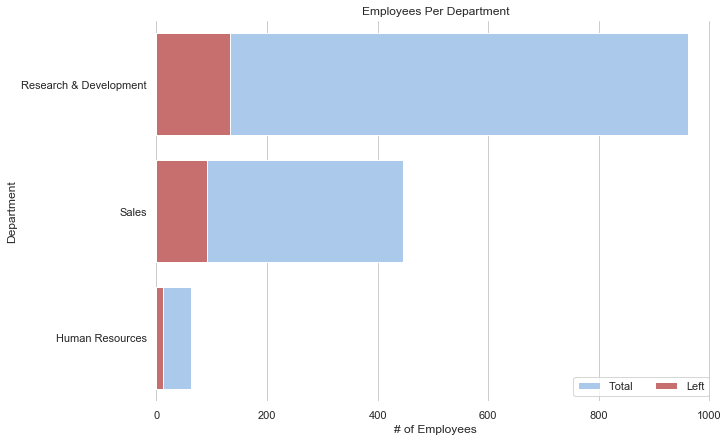

In [291]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 7))

# Plot the total schools per city
sns.set_color_codes("pastel")
sns.barplot(x="stay", y='Department', data=hr_merge,
            label="Total", color="b")

# Plot the total community schools per city
sns.set_color_codes("muted")
sns.barplot(x="left", y="Department", data=hr_merge,
            label="Left", color="r")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set( ylabel="Department", title='Employees Per Department',
       xlabel="# of Employees")
sns.despine(left=True, bottom=True)

#### Highest Attrition is seen in Research & Development

# Pre-Processing
#### Apply get_dummies() to the categorical variables.Seperate categorical variables and numeric variables, then combine them

In [85]:
dict(hr.dtypes)

{'Age': dtype('int64'),
 'Attrition': dtype('O'),
 'BusinessTravel': dtype('O'),
 'DailyRate': dtype('int64'),
 'Department': dtype('O'),
 'DistanceFromHome': dtype('int64'),
 'Education': dtype('int64'),
 'EducationField': dtype('O'),
 'EnvironmentSatisfaction': dtype('int64'),
 'Gender': dtype('O'),
 'HourlyRate': dtype('int64'),
 'JobInvolvement': dtype('int64'),
 'JobLevel': dtype('int64'),
 'JobRole': dtype('O'),
 'JobSatisfaction': dtype('int64'),
 'MaritalStatus': dtype('O'),
 'MonthlyIncome': dtype('int64'),
 'MonthlyRate': dtype('int64'),
 'NumCompaniesWorked': dtype('int64'),
 'OverTime': dtype('O'),
 'PercentSalaryHike': dtype('int64'),
 'PerformanceRating': dtype('int64'),
 'RelationshipSatisfaction': dtype('int64'),
 'StockOptionLevel': dtype('int64'),
 'TotalWorkingYears': dtype('int64'),
 'TrainingTimesLastYear': dtype('int64'),
 'WorkLifeBalance': dtype('int64'),
 'YearsAtCompany': dtype('int64'),
 'YearsInCurrentRole': dtype('int64'),
 'YearsSinceLastPromotion': dtype(

In [86]:
#Labelling Attrition  column to 1,0 values which is orginally stored as yes,no
hr['Attrition'] = hr['Attrition'].str.lower().replace({'yes': 1, 'no': 0})

In [87]:
numeric_var_names=[key for key in dict(hr.dtypes) if dict(hr.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(hr.dtypes) if dict(hr.dtypes)[key] in ['object', 'O']]

categorical_hr = pd.get_dummies(hr[cat_var_names], drop_first=True)
numerical_hr = hr[numeric_var_names]

new_hr = pd.concat([categorical_hr,numerical_hr], axis=1)
new_hr.head()



,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,1,0,1,1,0,0,0,0,0,...,3,1,0,8,0,1,6,4,0,5
1,1,0,1,0,1,0,0,0,0,1,...,4,4,1,10,3,3,10,7,1,7
2,0,1,1,0,0,0,0,1,0,1,...,3,2,0,7,3,3,0,0,0,0
3,1,0,1,0,1,0,0,0,0,0,...,3,3,0,8,3,3,8,7,3,0
4,0,1,1,0,0,0,1,0,0,1,...,3,4,1,6,3,3,2,2,2,2


# Class Imbalance
## Employee Turnover Rate: 16%

#  Split Train/Test Set
### Let's split our data into a train and test set. We'll fit our model with the train set and leave our test set for our last evaluation

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve
# Create the X and y set
X = new_hr.drop('Attrition',axis=1)
y = new_hr['Attrition']
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X=pd.DataFrame(sc.fit_transform(X),columns=X.columns)

# Define train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=123, stratify=y)


# Choose Which Sampling Technique to Use For Model

In [89]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE 

# Upsample minority class
X_train_u, y_train_u = resample(X_train[y_train == 1],
                                y_train[y_train == 1],
                                replace=True,
                                n_samples=X_train[y_train == 0].shape[0],
                                random_state=1)

X_train_u = np.concatenate((X_train[y_train == 0], X_train_u))
y_train_u = np.concatenate((y_train[y_train == 0], y_train_u))


# Upsample using SMOTE
sm = SMOTE(random_state=12)
x_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)


# Downsample majority class
X_train_d, y_train_d = resample(X_train[y_train == 0],
                                y_train[y_train == 0],
                                replace=True,
                                n_samples=X_train[y_train == 1].shape[0],
                                random_state=1)
X_train_d = np.concatenate((X_train[y_train == 1], X_train_d))
y_train_d = np.concatenate((y_train[y_train == 1], y_train_d))


print("Original shape:", X_train.shape, y_train.shape)
print("Upsampled shape:", X_train_u.shape, y_train_u.shape)
print ("SMOTE sample shape:", x_train_sm.shape, y_train_sm.shape)
print("Downsampled shape:", X_train_d.shape, y_train_d.shape)

Original shape: (1176, 44) (1176,)
Upsampled shape: (1972, 44) (1972,)
SMOTE sample shape: (1972, 44) (1972,)
Downsampled shape: (380, 44) (380,)


# Apply 10-Fold Cross Validation for Logistic Regression
## Train on Original, Upsampled, SMOTE, and Downsampled Data
## Upsample
### You randomly resample the minority class to create new data.

## SMOTE
### You use the nearest neighbors of the minority observations to create new synthetic data

## Downsample
### You remove some samples of the majority class
### Objective:Train our Logistic Regression Model to our original, upsampled, and downsampled data to see which performs best.

## Resut:

#### Original Sample: F1 Score 54,31%
#### Upsample: F1 Score 77%
#### SMOTE: F1 Score 78.79%
#### Downsample: F1 Score 75.70%
#### SMOTE gives us the best performance



In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Create the Original, Upsampled, and Downsampled training sets
methods_data = {"Original": (X_train, y_train),
                "Upsampled": (X_train_u, y_train_u),
                "SMOTE":(x_train_sm, y_train_sm),
                "Downsampled": (X_train_d, y_train_d)}

# Loop through each type of training sets and apply 5-Fold CV using Logistic Regression
# By default in cross_val_score StratifiedCV is used
for method in methods_data.keys():
    lr_results = cross_val_score(LogisticRegression(), methods_data[method][0], methods_data[method][1], cv=5, scoring='f1')
    print(f"The best F1 Score for {method} data:")
    print (lr_results.mean())
 
cross_val_score(LogisticRegression(class_weight='balanced'), X_train, y_train, cv=5, scoring='f1').mean()

The best F1 Score for Original data:
0.5431669960015956
The best F1 Score for Upsampled data:
0.7700229207476426
The best F1 Score for SMOTE data:
0.7897972590492353
The best F1 Score for Downsampled data:
0.7570621363417812


0.49047665095135085

# Train Three Models
### Logistic Regression
### Random Forest
### Support Vector Machine

## Test Logistic Regression Performance¶
### Logistic Regression F1 Score (0.78)

### Apply 5-Fold Cross Validation for Random Forest

In [91]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

lr = LogisticRegression()

# Fit the model to the Upsampling data
lr = lr.fit(x_train_sm, y_train_sm)

print ("\n\n ---Logistic Regression Model---")
lr_auc = roc_auc_score(y_test, lr.predict(X_test))

print ("Logistic Regression AUC = %2.2f" % lr_auc)

lr2 = lr.fit(x_train_sm, y_train_sm)
print(classification_report(y_test, lr.predict(X_test)))



 ---Logistic Regression Model---
Logistic Regression AUC = 0.75
              precision    recall  f1-score   support

           0       0.94      0.75      0.83       247
           1       0.36      0.74      0.49        47

    accuracy                           0.75       294
   macro avg       0.65      0.75      0.66       294
weighted avg       0.85      0.75      0.78       294



## Random Forest Classifier

### Random Forest F1 Score (0.83)

In [116]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Model
rf = RandomForestClassifier()
                               

rf_result = cross_val_score(rf, x_train_sm, y_train_sm, cv=5)

rf_result.mean()

0.9346475615241276

In [117]:
from sklearn.metrics import roc_auc_score

rf = rf.fit(x_train_sm, y_train_sm)

print ("\n\n ---Random Forest Model---")
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, rf.predict(X_test)))



 ---Random Forest Model---
Random Forest AUC = 0.64
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       247
           1       0.78      0.30      0.43        47

    accuracy                           0.87       294
   macro avg       0.83      0.64      0.68       294
weighted avg       0.86      0.87      0.85       294



## Gradient Boosting Classifier

In [100]:
from sklearn.ensemble import GradientBoostingClassifier

In [113]:
gbc = GradientBoostingClassifier()
                               

gbc = gbc.fit(x_train_sm,y_train_sm)

gbc

GradientBoostingClassifier()

### Apply 5-Fold Cross Validation for Gradient Boosting Classifier

In [114]:
gbc_result = cross_val_score(gbc, x_train_sm, y_train_sm, cv=5)
gbc_result.mean()

0.8900687528111547

### Gradient Boosting Classifier F1 Score (0.87)

In [115]:
from sklearn.metrics import roc_auc_score

print ("\n\n ---Gradient Boosting Model---")
gbc_auc = roc_auc_score(y_test, gbc.predict(X_test))
print ("Gradient Boosting Classifier AUC = %2.2f" % gbc_auc)
print(classification_report(y_test, gbc.predict(X_test)))



 ---Gradient Boosting Model---
Gradient Boosting Classifier AUC = 0.72
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       247
           1       0.71      0.47      0.56        47

    accuracy                           0.88       294
   macro avg       0.81      0.72      0.75       294
weighted avg       0.87      0.88      0.87       294



In [120]:
gbc.predict_proba(X_test)

array([[0.56989268, 0.43010732],
       [0.97232017, 0.02767983],
       [0.80067387, 0.19932613],
       [0.95938592, 0.04061408],
       [0.69443441, 0.30556559],
       [0.97694446, 0.02305554],
       [0.48035494, 0.51964506],
       [0.23896157, 0.76103843],
       [0.97858988, 0.02141012],
       [0.95631889, 0.04368111],
       [0.86079349, 0.13920651],
       [0.8828724 , 0.1171276 ],
       [0.84216532, 0.15783468],
       [0.7946831 , 0.2053169 ],
       [0.55106136, 0.44893864],
       [0.95148893, 0.04851107],
       [0.61845606, 0.38154394],
       [0.88566596, 0.11433404],
       [0.67211104, 0.32788896],
       [0.95623364, 0.04376636],
       [0.08725503, 0.91274497],
       [0.67750601, 0.32249399],
       [0.9749607 , 0.0250393 ],
       [0.91593613, 0.08406387],
       [0.95518434, 0.04481566],
       [0.86658855, 0.13341145],
       [0.60317777, 0.39682223],
       [0.80810578, 0.19189422],
       [0.98911794, 0.01088206],
       [0.81598384, 0.18401616],
       [0.

In [29]:
# Get Feature Importances
feature_importances = pd.DataFrame(gbc.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances = feature_importances.reset_index()
feature_importances

,index,importance
0,StockOptionLevel,0.121285
1,JobInvolvement,0.082870
2,JobSatisfaction,0.067326
3,EnvironmentSatisfaction,0.062213
4,EducationField_Medical,0.051830
5,Department_Research & Development,0.040612
6,JobLevel,0.039600
7,MaritalStatus_Married,0.038277
8,MonthlyIncome,0.036833
9,Department_Sales,0.034569


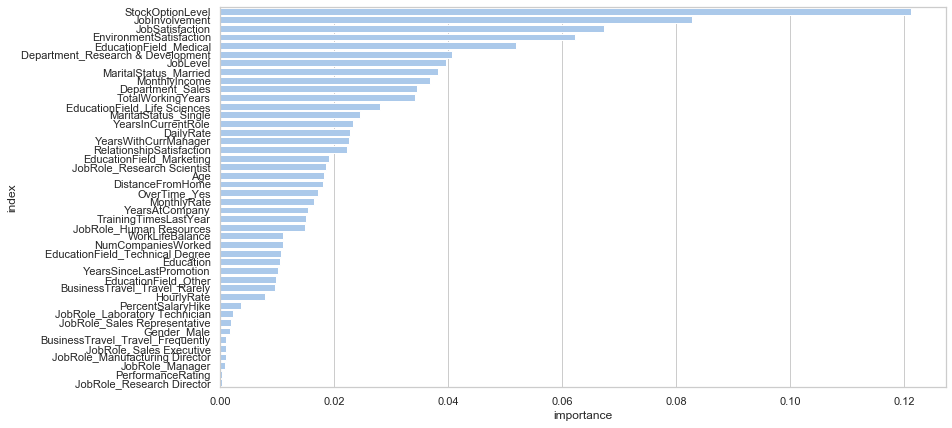

In [30]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(13, 7))

# Plot the Feature Importance
sns.set_color_codes("pastel")
sns.barplot(x="importance", y='index', data=feature_importances,
            label="Total", color="b")

# Apply Random Noise to Feature Importance

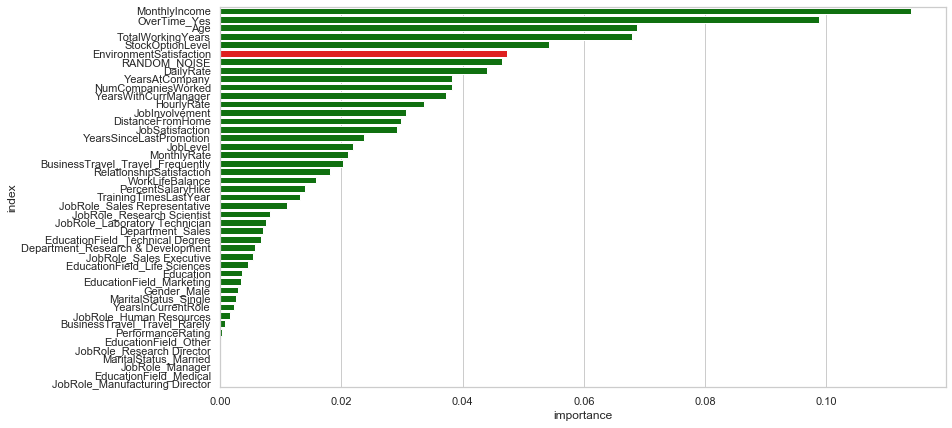

In [118]:
# Apply Random Noise to data set
X_train_rnoise = pd.DataFrame(X_train)
X_train_rnoise['RANDOM_NOISE'] = np.random.normal(0, 1, X_train_rnoise.shape[0])

# Fit Gradient Boosting  to DataSet
gbc_random = GradientBoostingClassifier()
gbc_random = gbc_random.fit(X_train_rnoise, y_train)

# Get Feature Importances
feature_importances_random = pd.DataFrame(gbc_random.feature_importances_, index = X_train_rnoise.columns,columns=['importance']).sort_values('importance', ascending=False)
feature_importances_random = feature_importances_random.reset_index()

# Create Seaborn PLot
sns.set(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(13, 7))


clrs = ['red' if (x == 5 ) else 'green' for x in feature_importances_random.index.values ]

# Plot the Feature Importance
sns.barplot(x="importance", y='index', data=feature_importances_random,
            label="Total",  palette=clrs)

# Retention Plan

Since this model is being used for people, we should refrain from soley relying on the output of our model. Instead, we can use it's probability output and design our own system to treat each employee accordingly. 

1.	**Safe Zone (Green)** – Employees within this zone are considered safe. 
2.	**Low Risk Zone (Yellow)** – Employees within this zone are too be taken into consideration of potential turnover. This is more of a long-term track.
3.	**Medium Risk Zone (Orange)** – Employees within this zone are at risk of turnover. Action should be taken and monitored accordingly. 
4.	**High Risk Zone (Red)** – Employees within this zone are considered to have the highest chance of turnover. Action should be taken immediately. 



# What to Optimize

We want our machine learn model to capture as much of the minority class as possible (turnover group). Our objective is to catch ALL of the highly probable turnover employee at the risk of flagging some low-risk non-turnover employee. 

# Conclusion
Binary Classification: Turnover V.S. Non Turnover

Instance Scoring: Likelihood of employee responding to an offer/incentive to save them from leaving.

Need for Application: Save employees from leaving

In our employee retention problem, rather than simply predicting whether an employee will leave the company within a certain time frame, we would much rather have an estimate of the probability that he/she will leave the company. We would rank employees by their probability of leaving, then allocate a limited incentive budget to the highest probability instances.

Consider employee turnover domain where an employee is given treatment by Human Resources because they think the employee will leave the company within a month, but the employee actually does not. This is a false positive. This mistake could be expensive, inconvenient, and time consuming for both the Human Resources and employee, but is a good investment for relational growth.

Compare this with the opposite error, where Human Resources does not give treatment/incentives to the employees and they do leave. This is a false negative. This type of error is more detrimental because the company lost an employee, which could lead to great setbacks and more money to rehire. Depending on these errors, different costs are weighed based on the type of employee being treated. For example, if it’s a high-salary employee then would we need a costlier form of treatment? What if it’s a low-salary employee? The cost for each error is different and should be weighed accordingly.

Solution 1:

We can rank employees by their probability of leaving, then allocate a limited incentive budget to the highest probability instances.
OR, we can allocate our incentive budget to the instances with the highest expected loss, for which we'll need the probability of turnover.
Solution 2: Develop learning programs for managers. Then use analytics to gauge their performance and measure progress. Some advice:

Be a good coach
Empower the team and do not micromanage
Express interest for team member success
Have clear vision / strategy for team
Help team with career development

# Selection Bias
One thing to note about this dataset is the turnover feature. We don't know if the employees that left are interns, contractors, full-time, or part-time. These are important variables to take into consideration when performing a machine learning algorithm to it.

Another thing to note down is the type of bias of the evaluation feature. Evaluation is heavily subjective, and can vary tremendously depending on who is the evaluator. If the employee knows the evaluator, then he/she will probably have a higher score.